In [182]:
# pytorch 随便拉个模型，熟悉一下流程

from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import os
from matplotlib.pylab import plt
import torch.nn as nn

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

In [177]:
class CCPDDataset(Dataset):
    def __init__(self, imgs_path, transform=None):
        self.filepath = imgs_path
        self.filenames = os.listdir(imgs_path)
        while ".DS_Store" in self.filenames:
            self.filenames.remove(".DS_Store")
        self.transform = transform
    def __len__(self):
        return len(self.filenames)
    def __getitem__(self, index):
        filename = self.filenames[index]
        # 图片数据
        img = Image.open(os.path.join(self.filepath, filename)).convert("RGB")
        # 找出带有车牌信息的文件名(chaos_name)以及扩展名(extension_name)
        chaos_name, _ = filename.split(os.sep)[-1].split(".")
        # 解析 chaos_name
        [area_ratio, tilt_degree, bounding_box_coordinates, 
            four_vertices_locations, license_plate_number, brightness, \
            blurriness] = chaos_name.split("-")
        # four_vertices_locations 四个顶点的位置
        four_vertices_locations_str_array = four_vertices_locations.split("_")
        self.four_vertices_locations = []
        for xy_str in four_vertices_locations_str_array:
            x_str, y_str = xy_str.split("&")
            self.four_vertices_locations += [int(x_str), int(y_str)]
        label = self.four_vertices_locations
        # TODO: transform
        if self.transform:
            img, label = self.transform(img, label)
        return img, label


In [187]:
def transformer(img, label):
    label = np.array(label)
    return img, label

In [234]:
def show_img(img, label):
    assert len(label) == 8 and type(label) == np.ndarray
    plt.imshow(img)
    [a,b,c,d,e,f,g,h] = label
    # plt.plot([a, c, e, g, a], [b, d, f, h, b], color="red")
    for i in range(0, 1160, 10):
        plt.plot([0, 720], [i, i], color="white")
    for i in range(0, 720, 10):
        plt.plot([i, i], [0, 1160], color="white")
    # plt.show()

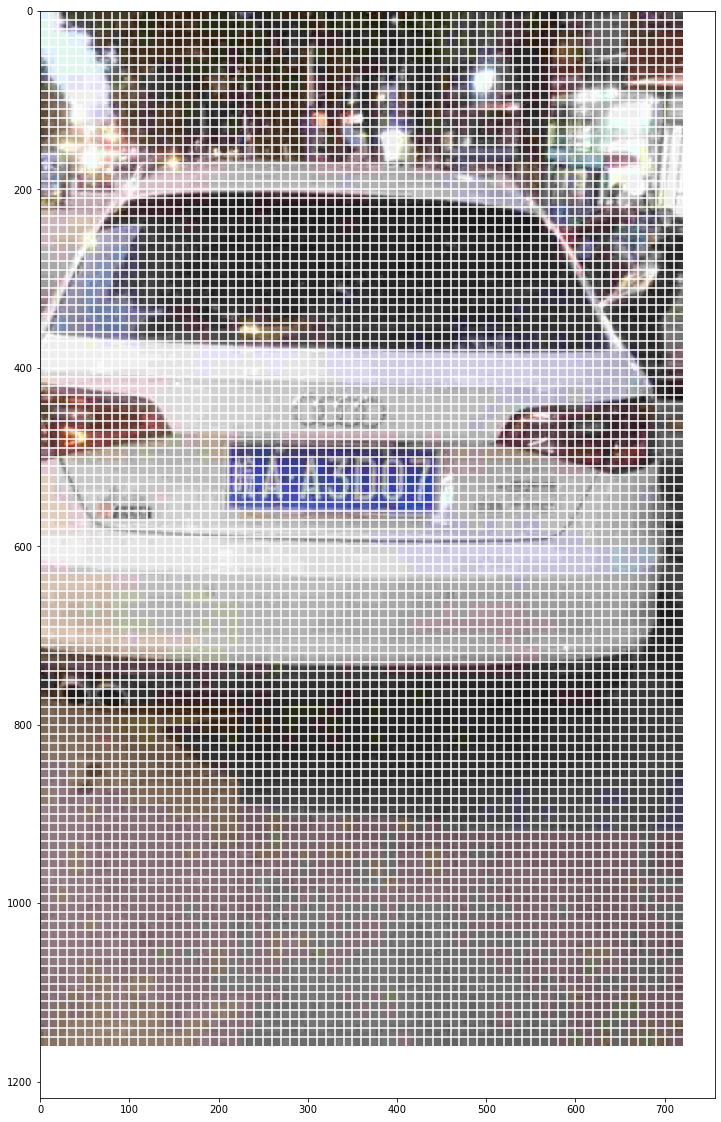

In [235]:
# test
dataset = CCPDDataset("samples/CCPD-base", transform=transformer)
img, label = dataset[9]
show_img(img, label)

In [185]:
model = nn.Sequential(
    # nn.Conv2d(3, 16, 3),
    # nn.ReLU(),
    # nn.MaxPool2d(2, )
)